# Pure diagrams for Thymol

In [1]:
import numpy as np
from epcsaftpy import component, pcsaft
import matplotlib.pyplot as plt

**Parameters Thymol from:**<br /> 
M. Martins, E. Crespo, P. Pontes, L. Silva, M. Bülow, G. Maximo, E. Batista, C. Held, S. Pinho, and J. Coutinho. ACS Sustainable Chem. Eng. 6, 8836−8846 (2018). https://doi.org/10.1021/acssuschemeng.8b01203

In [2]:
Thy = component('Thymol', ms = 4.012, sigma = 3.816, eps = 290.22,
                kappaAB = 0.0616, eAB = 1660.0 , sites = [0, 1, 1], Mw =  150.22 )
saft = pcsaft(Thy)

# VLE calculation
T0 = 250.
Tf = saft.Tc
n = 200                                                 # Number of points
Tsat_cal  = np.linspace(T0, Tf, n)                      # Temperature vector
Psat_cal  = np.zeros_like(Tsat_cal)                     # Vector to save the information
for i in range(n - 1):                   
    Psat_cal[i], _, _  = saft.psat(Tsat_cal[i])         # Solving and saving the VLE
Psat_cal[-1] = saft.Pc                                  # Saving the critical point

# Isobaric calculation
T0 = 270.
Tf = 370.
n = 50                                                  # Number of points
Tr_cal  = np.linspace(T0, Tf, n)                        # Temperature vector
rhol_cal  = np.zeros_like(Tr_cal)                       # Vector to save the information
for i in range(n):                   
    rhol_cal[i] = saft.density(Tr_cal[i], 1.013e5, "L") # Solving the density


###### Experimental information Thymol from: 
M. Martins, E. Crespo, P. Pontes, L. Silva, M. Bülow, G. Maximo, E. Batista, C. Held, S. Pinho, and J. Coutinho. ACS Sustainable Chem. Eng. 6, 8836−8846 (2018). https://doi.org/10.1021/acssuschemeng.8b01203

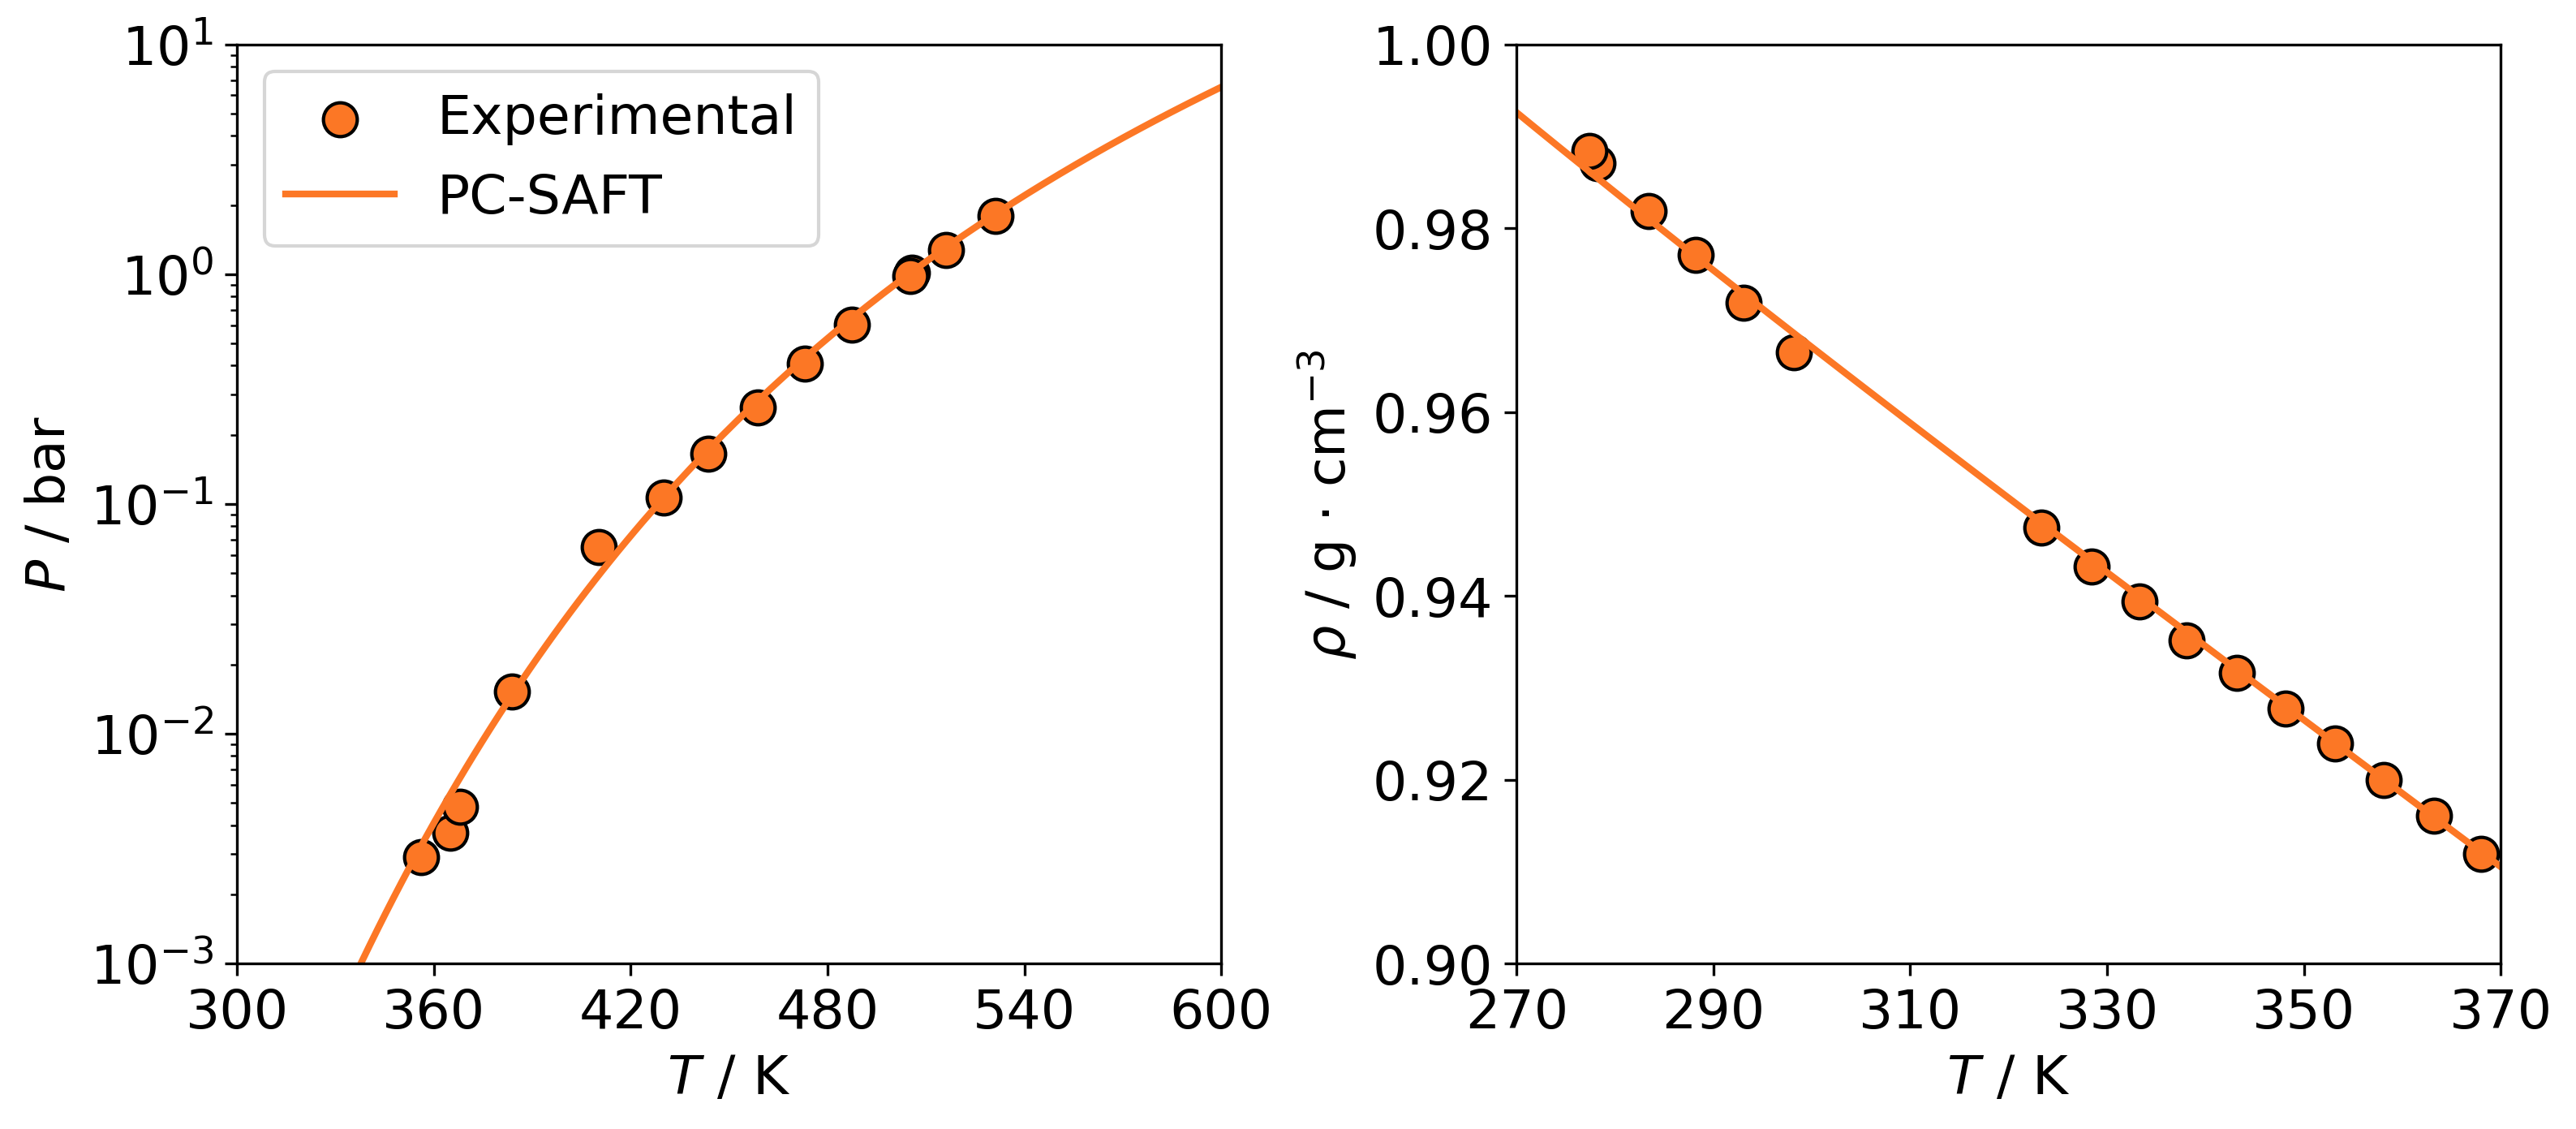

In [3]:
Tr   = np.array([368.0, 363.2, 358.1, 353.2, 348.1, 343.2, 
                 338.1, 333.3, 328.4, 323.3, 298.2, 293.1,
                 288.2, 283.4, 278.2, 277.4])                     # K
rhol = np.array([911.9, 916.1, 920.0, 923.9, 927.7, 931.6, 
                 935.2, 939.4, 943.2, 947.4, 966.5, 971.9,
                 977.1, 981.9, 987.1, 988.4])                     # kg/m3

Tsat = np.array([356.1, 365.0, 368.0, 383.8, 410.3, 430.0, 
                 443.6, 458.7, 473.0, 487.5, 505.8, 505.1,
                 516.2, 531.1])                                   # K
Psat = np.array([0.0029, 0.0037, 0.0048, 0.0153, 0.0650, 
                 0.1063, 0.1651, 0.2632, 0.4087, 0.6026,
                 1.0114, 0.9856, 1.2768, 1.7877])                 # bar


font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


colorVLE = "#FC7725"

fig, axs = plt.subplots(1,2, figsize=(12, 5), dpi = 300)
fig.subplots_adjust(hspace=0.5, wspace=0.3)


ax = axs[0]
ax.scatter(Tsat, Psat, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.plot(Tsat_cal, Psat_cal * 1e-5, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$T$ / K')
ax.set_ylabel('$P$ / bar')
ax.axis([300, 600., 1e-3, 10.])

ax.set_yscale('log')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 6))
ax.legend()

ax = axs[1]
ax.scatter(Tr, rhol * 1e-3, s = 100, c = colorVLE, marker="o", 
            linewidth=1.0, edgecolor='k', label = "Experimental")
ax.plot(Tr_cal, saft.Mw * rhol_cal * 1e-6, color = colorVLE , 
        linewidth = 2.0, label = "PC-SAFT")

ax.set_xlabel('$T$ / K')
ax.set_ylabel(r'$\rho$ / g $\cdot$ cm$^{-3}$')
ax.axis([270, 370., 0.9, 1.0])

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 6))
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.linspace(start, end, 6))


plt.show()